## Identification of Geospiza in Darwin's finches  
* Data source: Issues and perspectives in species delimitation using phenotypic data: Atlantean evolution in Darwin's finches. Cadena CD, Zapata F, Jiménez I. https://www.datadryad.org/handle/10255/dryad.155375  
* Date Published: September 1, 2017  
* Classify the species of Geosipiza based on 6 phenotypic measurements and sampling islands

### Load the data and extract informative features

In [1]:
# Load libraries
import sys
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read data
mydata = pd.read_csv("Dataset/Geospiza.csv", sep = ",", header = 0)
mydata.head()

,Taxon,Institution,Museum No.,Island,Taxon-Island,New_Taxonomy,New_Taxonomy_Island,Sex,Wing,Tail,Blength,Bdepth,Bwidth,Tarsus
0,G. conirostris,Rotheschild Mus.,1916.0,Darwin,conirostrisDarwin,G. propinqua,propinquaDarwin,Male,78.2,46.0,19.5,14.0,11.0,25.2
1,G. conirostris,Rotheschild Mus.,1918.0,Darwin,conirostrisDarwin,G. propinqua,propinquaDarwin,Male,81.5,53.0,22.2,17.2,13.5,26.5
2,G. conirostris,Rotheschild Mus.,1931.0,Darwin,conirostrisDarwin,G. propinqua,propinquaDarwin,Male,81.0,49.5,21.2,16.2,12.2,23.5
3,G. conirostris,Rotheschild Mus.,NaN,Darwin,conirostrisDarwin,G. propinqua,propinquaDarwin,Male,78.0,48.8,20.0,14.2,11.0,25.2
4,G. conirostris,Rotheschild Mus.,1930.0,Darwin,conirostrisDarwin,G. propinqua,propinquaDarwin,Male,84.0,53.2,22.2,19.5,14.0,24.5


In [3]:
# Summarize the data
mydata.describe()

,Museum No.,Wing,Tail,Blength,Bdepth,Bwidth,Tarsus
count,485.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,5903.779381,69.574280,42.902881,16.189095,11.350206,9.009877,21.628807
std,3466.470112,6.613929,4.356102,3.660385,3.892158,2.703191,1.969288
min,104.000000,55.200000,33.500000,10.000000,6.200000,5.500000,17.000000
25%,5195.000000,64.000000,39.500000,12.500000,8.200000,7.000000,20.000000
50%,5409.000000,70.000000,42.500000,16.000000,10.000000,8.200000,21.500000
75%,5945.000000,73.000000,45.500000,18.500000,13.200000,10.200000,23.000000
max,37932.000000,86.500000,57.500000,26.000000,23.000000,17.000000,26.500000


In [4]:
# Count categorical variables
mydata["Island"].value_counts()

Santa Cruz       50
Santiago         48
San Cristobal    45
Pinta            40
Isabela          40
Floreana         40
Marchena         31
Pinzon           25
Darwin           23
Genovesa         22
Fernandina       20
Espanola         20
Santa Fe         20
Rabida           20
Wolf             12
Baltra           10
Daphne           10
Gardner          10
Name: Island, dtype: int64

In [5]:
# Count the number of instances in each class
mydata["New_Taxonomy"].value_counts()

G. fortis             150
G. fuliginosa         121
G. scandens            72
G. magnirostris        49
G. difficilis          25
G. conirostris         20
G. septentrionalis     20
G. propinqua           19
G. acutirostris        10
Name: New_Taxonomy, dtype: int64

In [6]:
# Better to also count the number of species on each island
pd.crosstab(mydata.Island, mydata.New_Taxonomy)

New_Taxonomy,G. acutirostris,G. conirostris,G. difficilis,G. fortis,G. fuliginosa,G. magnirostris,G. propinqua,G. scandens,G. septentrionalis
Island,,,,,,,,,
Baltra,0,0,0,10,0,0,0,0,0
Daphne,0,0,0,10,0,0,0,0,0
Darwin,0,0,0,0,0,3,10,0,10
Espanola,0,10,0,0,10,0,0,0,0
Fernandina,0,0,0,10,10,0,0,0,0
Floreana,0,0,0,20,10,0,0,10,0
Gardner,0,10,0,0,0,0,0,0,0
Genovesa,10,0,0,0,0,3,9,0,0
Isabela,0,0,0,20,10,0,0,10,0


In [7]:
# Remove the uninformative features
mydata0 = mydata.copy()
mydata0 = mydata0.drop(["Taxon", "Taxon-Island", "Institution", "Museum No.", "New_Taxonomy_Island", "Sex"], axis = 1)
mydata0.shape

(486, 8)

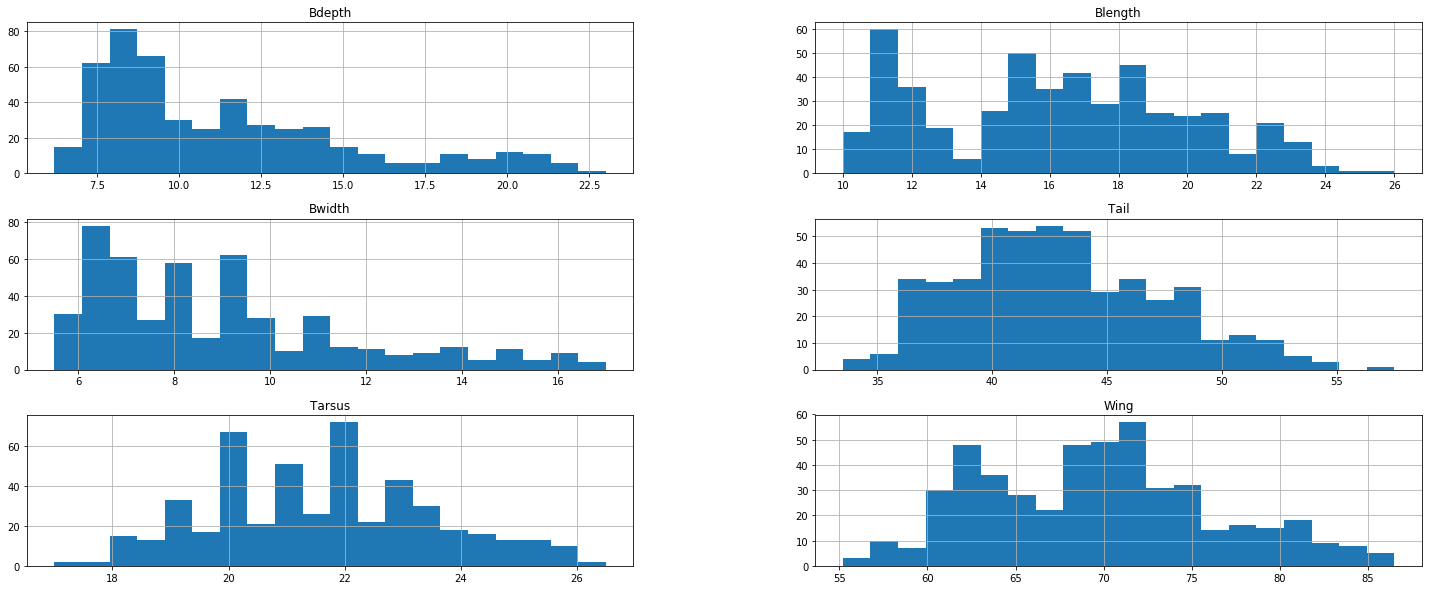

In [8]:
# Distribution of the features
mydata0.hist(bins=20, figsize=(25, 10))
plt.show()

In [9]:
# Check the empty values
mydata0.isna().sum()

Island          0
New_Taxonomy    0
Wing            0
Tail            0
Blength         0
Bdepth          0
Bwidth          0
Tarsus          0
dtype: int64

### Split data to training and test sets  
No obvious bias or outliers observed in the overview of the data. We can move on to further exploration after splitting the data.  
Because the classes are not balanced, we need to do stratified sampling.

In [11]:
# Randomize and split the data
random_index = np.random.permutation(mydata0.index)
data_shuffled = mydata0.reindex(random_index)

# Separate label and features
y = data_shuffled["New_Taxonomy"]
X = data_shuffled.drop("New_Taxonomy", axis=1)

train_X, test_X, train_y, test_y = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
train_X.shape

(388, 7)

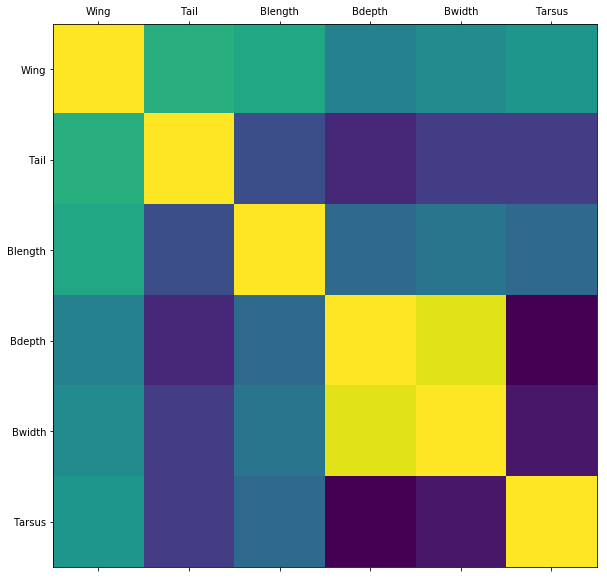

In [12]:
# Explore the correlations of the features
train_tmp = train_X.copy()
corr_matrix = train_tmp.corr()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix)
ax.set_xticklabels([''] + train_tmp.columns)
ax.set_yticklabels([''] + train_tmp.columns)

plt.show()

In [13]:
corr_matrix["Tarsus"].sort_values(ascending = False)

Tarsus     1.000000
Wing       0.885196
Blength    0.839968
Tail       0.801313
Bwidth     0.772677
Bdepth     0.757307
Name: Tarsus, dtype: float64

From the correlation matrix above, we can tell beak depth and beak length are highly correlated. 

### Prepare the data for training

In [14]:
# Convert categorical variables and scale the data
pipeline = ColumnTransformer([
  ("numeric", Normalizer(), list(train_X.drop("Island", axis = 1))),
  ("categorical", OneHotEncoder(), ["Island"])
])

# fit and transform training data
train_X_input = pipeline.fit_transform(train_X)

# Transform test data
test_X_input = pipeline.transform(test_X)
test_X_input.shape

(98, 24)

### Train the model and evaluate it
#### A simple decision tree model

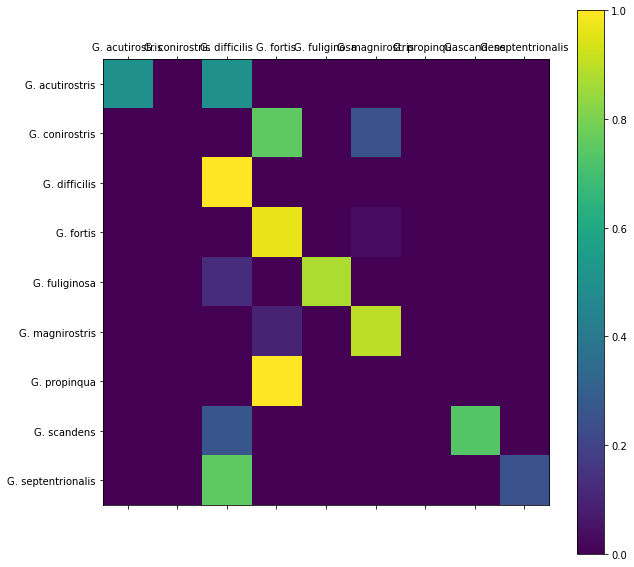

0.7857142857142857

In [15]:
# fit training data to the model
dt = DecisionTreeClassifier(random_state=42, max_depth= 3)
dt.fit(train_X_input, train_y)
# predict the test data
dt_test_y = dt.predict(test_X_input)
# Genrate a confusion matrix
def cm_plot(test_y, dt_test_y):
  """Make a heat map of the confusion matrix"""
  classes = list(unique_labels(test_y, dt_test_y))
  dt_test_y_cm = confusion_matrix(test_y, dt_test_y, labels=classes)
  row_sum = dt_test_y_cm.sum(axis=1, keepdims = True)
  norm_dt_test_y_cm = np.matrix.round(dt_test_y_cm/row_sum, 3)
  #np.fill_diagonal(norm_dt_test_y_cm, 0)
  # make a plot
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111)
  cax = ax.matshow(norm_dt_test_y_cm)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + classes)
  ax.set_yticklabels([''] + classes)
  plt.show()

cm_plot(test_y, dt_test_y)
# Accuracy
dt_accuracy = accuracy_score(test_y, dt_test_y)
dt_accuracy


In [20]:
# Evaluate the model
cv = cross_val_score(dt, train_X_input, train_y, cv = 5, scoring="accuracy")
np.mean(cv)

0.8246866330468375

#### Random Forest model

In [21]:
# fit model
rf = RandomForestClassifier(random_state=42)
rf.fit(train_X_input, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
# Predict the test data
rf_test_y = rf.predict(test_X_input)
rf_accuracy = accuracy_score(test_y, rf_test_y)
rf_accuracy

0.9081632653061225

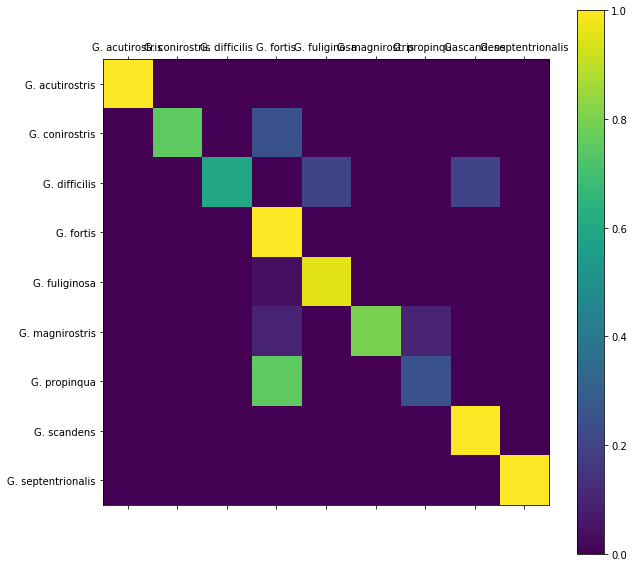

In [23]:
# Confusion matrix for random forest model
cm_plot(test_y, rf_test_y)

In [24]:
# Find the most important features
rf_importance = rf.feature_importances_

rf_importance = pd.DataFrame(rf_importance, 
             index = list(pipeline.transformers_[1][1].get_feature_names()) + pipeline.transformers_[0][2],
            columns=["Feature_Importance"]).sort_values(by = "Feature_Importance")
rf_importance[~rf_importance.index.str.contains("x0")]

,Feature_Importance
Bwidth,0.003938
Bdepth,0.004386
Wing,0.006024
Blength,0.007395
Tail,0.009419
Tarsus,0.022198


In [25]:
# Island importance
rf_importance[rf_importance.index.str.contains("x0")]

,Feature_Importance
x0_Gardner,0.000359
x0_Wolf,0.001057
x0_Santa Fe,0.001394
x0_Santa Cruz,0.001754
x0_Genovesa,0.001996
x0_Pinta,0.002006
x0_Santiago,0.002718
x0_Pinzon,0.005574
x0_Rabida,0.018460
x0_Marchena,0.028109


In [26]:
# We can do predictions on some examples
#example = mydata0.sample(n = 1, axis = 0)
example = mydata0[mydata0.New_Taxonomy == "G. conirostris"].sample(n = 10, axis = 0)
example

,Island,New_Taxonomy,Wing,Tail,Blength,Bdepth,Bwidth,Tarsus
467,Espanola,G. conirostris,83.5,47.5,23.5,18.5,13.0,24.2
477,Gardner,G. conirostris,77.0,49.5,19.8,14.2,10.8,23.2
485,Gardner,G. conirostris,75.2,48.0,22.0,16.2,12.2,24.0
483,Gardner,G. conirostris,79.0,45.8,20.0,15.2,11.2,23.2
482,Gardner,G. conirostris,74.5,46.0,19.5,14.0,10.8,23.0
470,Espanola,G. conirostris,74.0,45.5,20.5,15.2,11.5,23.5
476,Gardner,G. conirostris,79.0,48.5,18.5,14.0,10.0,23.0
484,Gardner,G. conirostris,74.0,47.0,18.0,12.5,9.2,22.0
474,Espanola,G. conirostris,78.5,46.5,22.2,16.5,12.8,23.8
466,Espanola,G. conirostris,77.5,50.0,19.0,14.5,11.0,23.2


In [27]:
example_input = pipeline.transform(example.drop("New_Taxonomy", axis = 1))
rf.predict(example_input)

array(['G. conirostris', 'G. conirostris', 'G. conirostris',
       'G. conirostris', 'G. conirostris', 'G. conirostris', 'G. fortis',
       'G. conirostris', 'G. conirostris', 'G. conirostris'], dtype=object)

### Without island information
From the importance rank, I noticed that the feature of sampling island played a critical role in this classfification. This is because most species are only habiting on limited number of islands. I will have a go without island information.

In [28]:
# re-preprocessing the features
train_X1 = train_X.drop("Island", axis=1)
test_X1 = test_X.drop("Island", axis=1)

pipeline1 = ColumnTransformer([
  ("num", Normalizer(), list(train_X1))
   ])

train_X1_input = pipeline1.fit_transform(train_X1)
test_X1_input = pipeline1.transform(test_X1)

train_X1.describe()

,Wing,Tail,Blength,Bdepth,Bwidth,Tarsus
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,69.609278,42.935052,16.203866,11.346392,9.014175,21.667010
std,6.611298,4.352831,3.690922,3.913696,2.699561,1.960078
min,55.200000,33.500000,10.000000,6.200000,5.500000,17.000000
25%,64.000000,39.500000,12.500000,8.200000,7.000000,20.000000
50%,70.000000,42.900000,16.350000,10.000000,8.200000,21.800000
75%,73.000000,46.000000,18.575000,13.200000,10.200000,23.000000
max,86.500000,57.500000,26.000000,23.000000,17.000000,26.500000


#### Random Forest 

In [29]:
# Random Forest model on data without island
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(train_X1_input, train_y)

# predict the test set
rf1_test_y = rf1.predict(test_X1_input)
rf1_accuracy = accuracy_score(test_y, rf1_test_y)
rf1_accuracy

0.8163265306122449

In [30]:
# I can try to tune the parameters to improve the accuracy
from sklearn.model_selection  import GridSearchCV
param_grid = {
  "max_depth": [3, 5, 10, 15],
  "min_samples_leaf": [1, 3, 4],
  "min_samples_split": [5, 10, 15],
  "n_estimators": [50, 100]
}

grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid, cv = 5)
grid_search.fit(train_X1_input, train_y)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 10, 15], 'min_samples_leaf': [1, 3, 4], 'min_samples_split': [5, 10, 15], 'n_estimators': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
# feature importance with the best parameters
rf1_best_estimators = grid_search.best_estimator_
pd.DataFrame(rf1_best_estimators.feature_importances_, 
             index = list(train_X1), 
             columns=["Feature_Importance"]).sort_values(by = "Feature_Importance")

,Feature_Importance
Tail,0.053520
Wing,0.062132
Tarsus,0.087398
Bwidth,0.218462
Bdepth,0.251710
Blength,0.326778


In [32]:
# Predict on the best estimators
rf1_test_y = rf1_best_estimators.predict(test_X1_input)
rf1_accuracy = accuracy_score(test_y, rf1_test_y)
rf1_accuracy

0.826530612244898

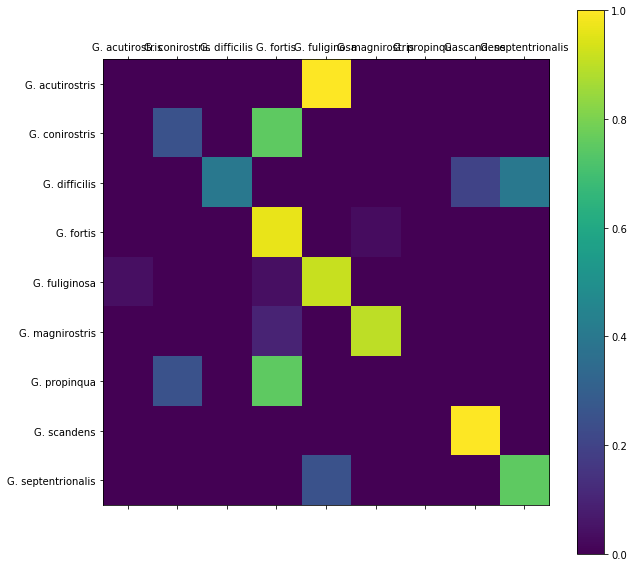

In [33]:
# Confusion matrix on rf1
cm_plot(test_y, rf1_test_y)

#### SGD model

In [34]:
# SGD classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42, shuffle=True)
# find the best parameters
param_grid = {
  "learning_rate": ["constant","optimal", "invscaling", "adaptive"],
  "eta0": [0.0001],
  "alpha": [0.05, 0.1,0.2],
  "max_iter": [3000, 5000]
}

grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv = 5)
grid_search.fit(train_X1_input, train_y)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 'eta0': [0.0001], 'alpha': [0.05, 0.1, 0.2], 'max_iter': [3000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
best_sgd = grid_search.best_estimator_
cross_val_score(best_sgd, train_X1_input, train_y, cv = 5, scoring="accuracy")
sgd_test_y = best_sgd.predict(test_X1_input)
sgd_accuracy = accuracy_score(test_y, sgd_test_y)
sgd_accuracy

0.673469387755102

#### SVM model

The SGD classifier cannot make the classification better than Random Forest. The reason could be due to the small training data size or I haven't achieve the optimal hyperparameters (It is very difficult to tune SGD optimizer).

In [36]:
# SVC
from sklearn.svm import SVC
svc = SVC(random_state=42)
# find the best parameters
param_grid = {
  "C": [5000, 10000, 20000],
  "degree": [0, 1, 2, 3],
  "kernel": ["rbf", "poly", "linear"]
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv = 5)
grid_search.fit(train_X1_input, train_y)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [5000, 10000, 20000], 'degree': [0, 1, 2, 3], 'kernel': ['rbf', 'poly', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
# predict on the best parameters
best_svc = grid_search.best_estimator_
best_svc
cross_val_score(best_svc, train_X1_input, train_y, cv = 5, scoring="accuracy")
svc_test_y = best_svc.predict(test_X1_input)
svc_accuracy = accuracy_score(test_y, svc_test_y)
svc_accuracy

0.8571428571428571

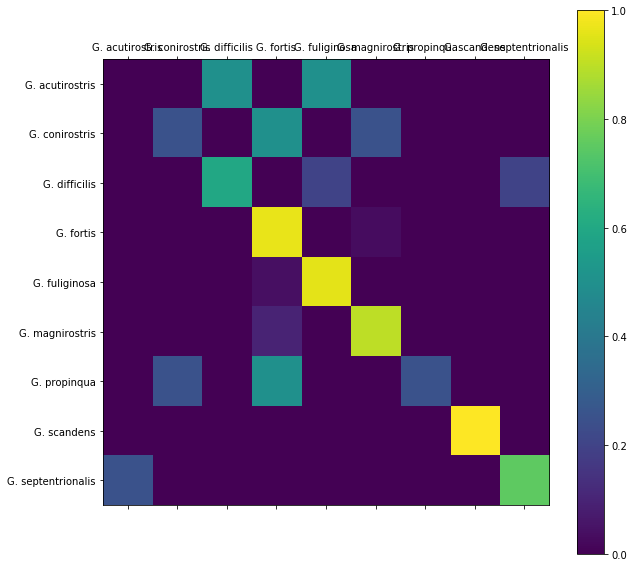

In [38]:
# Confusion matrix for SVC with rbf kernel
cm_plot(test_y, svc_test_y)

### Conclusion
I used seven features including six morphological measurements and sampling island to investigate whether species in Geospiza genus could be distinguished. I tried Decision Tree and Random Forest models, and their accuracies can reach 78% and 91%, respectively. The species that has the highest classification error is G.propinqua, which has ~ 80% chance to be identified as G. fortis. A very critical feature in this classification is the island where the species resides, because most species only habit on limited islands. 

However, the accuracy cannot reach that high if I drop the island information, which is about 86 using SVC model. This is because multiple species have similar morphology. The best model on the classification without island information is SVM. The three most important features this time become beak length, beak depth and beak width, which fits perfectly with our knowledge about the most pronounced phenotypes in Darwin's finches.

This classification is only done on less than 500 male birds within Geospiza genus. It would be nice to have more training data from different genera. 

### Application
* If you want to make a classfication on an unknown species, please run the following code after implementing the code above  
* Change the phenotypic measures for your own sample; Island information is optional  
* So far no NaN input is allowed


In [40]:
# Predict the species of an unknown sample
# given the corresponding morphological measures
#Island = "Espanola"
Wing = 76.7
Tail = 48.0
Blength = 14.07
Bdepth = 12.37
Bwidth = 10.97
Tarsus = 21.3

# Function to make the prediction
def my_sample_prediction(Wing, Tail, Blength, Bdepth, Bwidth, Tarsus, Island = None):
  if Island is not None:
    my_data = { 
                "Island": Island,
               "Wing": Wing, 
                "Tail": Tail, 
               "Blength": Blength, 
               "Bdepth": Bdepth, 
               "Bwidth": Bwidth, 
               "Tarsus": Tarsus}
    my_sample = pd.DataFrame(my_data, index = [0])
    my_sample = pipeline.transform(my_sample)
    rf_my_sample = rf.predict(my_sample)
    print(Wing, Tail, Blength, Bdepth, Bwidth, Tarsus, Island)
    print(rf_my_sample)
  else:
    my_data = { 
               "Wing": Wing, 
                "Tail": Tail, 
               "Blength": Blength, 
               "Bdepth": Bdepth, 
               "Bwidth": Bwidth, 
               "Tarsus": Tarsus}
    my_sample = pd.DataFrame(my_data, index = [0])
    my_sample = pipeline1.transform(my_sample)
    svc_my_sample = best_svc.predict(my_sample)
    print(Wing, Tail, Blength, Bdepth, Bwidth, Tarsus, Island)
    print(svc_my_sample)

my_sample_prediction(Wing, Tail, Blength, Bdepth, Bwidth, Tarsus)

76.7 48.0 14.07 12.37 10.97 21.3 None
['G. fortis']
